# 550 - Lab 4

## Lecture learning goals

By the end of the lecture you will be able to:

1. Layout plots in panels of a figure grid using ggplot 
2. Save figures outside the notebook.
3. Understand figure formats in the notebook.
4. Retrieve info on further topics online.

## (No submissions)

There is no associated submission for this lab -- simply a collection of information for you to have as you continue your journey of making visualizations.

In [38]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt
import pandas as pd

# Save a vega-lite spec and a PNG blob for each plot in the notebook
#alt.renderers.enable('default')
# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')

# Load the R cell magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Figure composition

Let's create two figures to layout together.
The titles here are a bit redundant,
they're just mean to facilitate spotting which figure goes where 
in the multi-panel figure.  We first recall how to do this in Altair and move on to ggplot.

In [39]:
import altair as alt
from vega_datasets import data

cars = data.cars()

In [ ]:
mpg_weight = alt.Chart(cars, title='x = mpg').mark_point().encode(
    x=alt.X('Miles_per_Gallon'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')
mpg_weight

alt.Chart(...)

If a variable is shared between two figures,
it is a good idea to have it on the same axis.
This makes it easier to compare the relationship
with the previous plot.

In [ ]:
hp_weight = alt.Chart(cars, title='x = hp').mark_point().encode(
    x=alt.X('Horsepower'),
    y=alt.Y('Weight_in_lbs'),
    color='Origin')
hp_weight

alt.Chart(...)

To concatenate plots vertically,
we can use the ampersand operator.

In [ ]:
mpg_weight & hp_weight

alt.VConcatChart(...)

To concatenate horizontally,
we use the pipe operator.

In [ ]:
mpg_weight | hp_weight

alt.HConcatChart(...)

To add an overall title to the figure,
we can use the `properties` method.
We need to surround the plots with a parentheis
to show that we are using `properties` of the composed figures
rather than just `hp_weight` one.

In [ ]:
(mpg_weight | hp_weight).properties(title='Overall title')

alt.HConcatChart(...)

In addition to `&` and `|`,
we could use the functions `vconcat` and `hconcat`.
You can use what you find the most convenient,
this is how to add a title with one of those functions.

In [ ]:
alt.hconcat(mpg_weight, hp_weight, title='Overall title')

alt.HConcatChart(...)

We can also build up a figure with varying sizes 
for the different panels,
e.g. adding marginal distribution plots to a scatter plot.

In [ ]:
mpg_hist = alt.Chart(cars).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=True),
    y='count()').properties(height=100)
mpg_hist

alt.Chart(...)

In [ ]:
weight_ticks = alt.Chart(cars).mark_tick().encode( 
    x='Origin',
    y='Weight_in_lbs',
    color='Origin')
weight_ticks

alt.Chart(...)

In [ ]:
mpg_weight | weight_ticks

alt.HConcatChart(...)

Just adding operations after each other can lead to the wrong grouping of the panels in the figure.

In [ ]:
mpg_hist & mpg_weight | weight_ticks

alt.HConcatChart(...)

Adding parenthesis can indicate how to group the different panels.

In [ ]:
mpg_hist & (mpg_weight | weight_ticks)

alt.VConcatChart(...)

# Saving figures

Saving as HTML ensures that any interactive features are still present in the saved file.

In [ ]:
combo = mpg_hist & (mpg_weight | weight_ticks)
combo.save('combo.html')

It is also possible to save as non-interactive formats 
such as png, svg, and pdf.
The png and pdf formats can be a bit tricky to get to work correctly,
as they depend on other packages.
Installation for these can be taken care of by installing [`altair_saver`](https://github.com/altair-viz/altair_saver), but even after following the [additional instruction in the github repo](https://github.com/altair-viz/altair_saver/#additional-requirements) and [stack overflow](https://github.com/altair-viz/altair_saver/issues/104) (which includes a "fix" of installing a downgraded version of `selenium`) I had no luck.  

If you have trouble saving in these file formats using these methods, then you can always click the ... button on your chart and and "Save as PNG"/"Save as SVG" that way.

In [ ]:
# combo.save('combo.png') # <-- this didn't work for me

The resolution/size of the saved image can be controlled via the `scale_factor` parameter.

In [ ]:
# combo.save('combo-hires.png', scale_factor=3) # <-- this didn't work for me

**NOTE**: Every time you run an Altair
chart it takes the entire dataset, converts it to json and embeds it in
your notebook.  So if you have a large dataset with say 10,000 rows and you make six charts you've embedded six copies of those 10,000 rows in your notebooks.  This is why Altair produces a warning when your data set exceed 5000 rows. When we enable the `data_server` transformer using `alt.data_transformers.enable('data_server')` (called in the first cell of each notebook) every 
time we run a chart instead of embedding the data into the notebook it saves that data to a temporary file on your computer and then references it.  To see this you can run the following to see the vega-lite schema thats created under the hood:

In [ ]:
mpg_hist.to_dict()

{'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}},
 'data': {'name': 'data-f02450ab61490a1363517a0190416235'},
 'mark': {'type': 'bar'},
 'encoding': {'x': {'bin': True,
   'field': 'Miles_per_Gallon',
   'type': 'quantitative'},
  'y': {'aggregate': 'count', 'type': 'quantitative'}},
 'height': 100,
 '$schema': 'https://vega.github.io/schema/vega-lite/v5.16.3.json',
 'datasets': {'data-f02450ab61490a1363517a0190416235': [{'Name': 'chevrolet chevelle malibu',
    'Miles_per_Gallon': 18.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Weight_in_lbs': 3504,
    'Acceleration': 12.0,
    'Year': '1970-01-01T00:00:00',
    'Origin': 'USA'},
   {'Name': 'buick skylark 320',
    'Miles_per_Gallon': 15.0,
    'Cylinders': 8,
    'Displacement': 350.0,
    'Horsepower': 165.0,
    'Weight_in_lbs': 3693,
    'Acceleration': 11.5,
    'Year': '1970-01-01T00:00:00',
    'Origin': 'USA'},
   {'Name': 'plymouth satellite',
    'Miles_per_Gallon': 

Try reruning your notebook with the data_server removed.  You will find that all the values of the data frame appear in `'data'`.  Note that this temporary JSON file is called on `'url'`.  In a similar way, if we point to the data at a URL from the web, we will save space in our notebook in a similar way.

# Figure composition in ggplot

In [ ]:
%%R
library(tidyverse)

UsageError: Cell magic `%%R` not found.


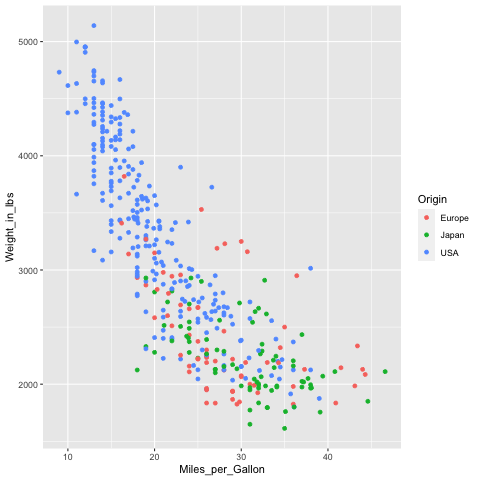

In [ ]:
%%R -i cars
mpg_weight <- ggplot(cars) +
    aes(x = Miles_per_Gallon,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
mpg_weight

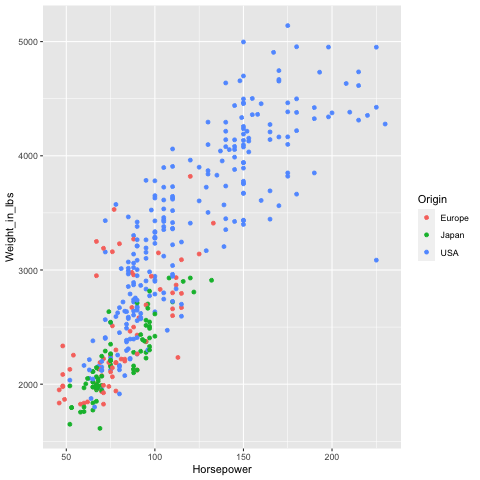

In [ ]:
%%R -i cars
hp_weight <- ggplot(cars) +
    aes(x = Horsepower,
        y = Weight_in_lbs,
        color = Origin) +
    geom_point()
hp_weight

Laying out figures is not built into ggplot,
but the functionality is added in separate packages.
`patchwork` is similar to the operator-syntax we used with Altair,
and `cowplot` works similar to the concatenation functions in Altair.
Here I will be showing the latter,
but you're free to use either
("cow" are the author's initials,
Claus O Wilke, the same person who wrote Fundamentals of Data Visualization).

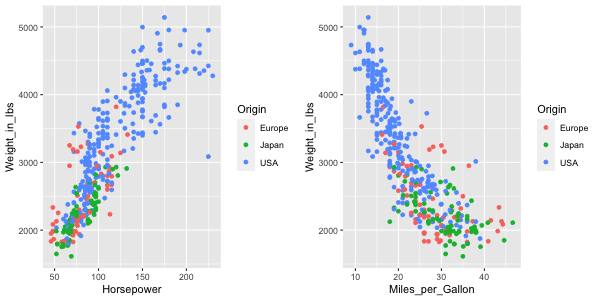

In [ ]:
%%R -w 600 -h 300
library(cowplot)

plot_grid(hp_weight, mpg_weight)

Panels can easily be labeled.

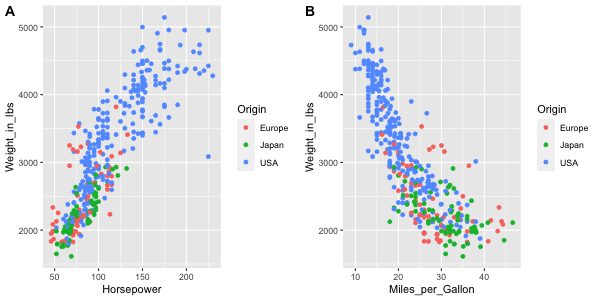

In [ ]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels=c('A', 'B'))

And this can even be automated.

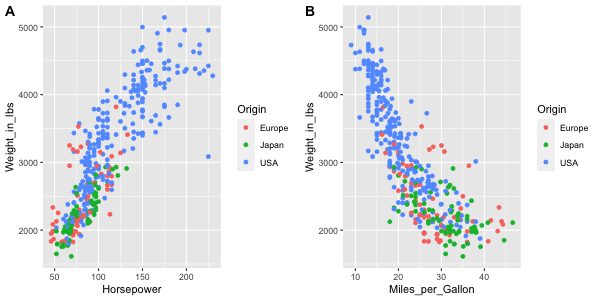

In [ ]:
%%R -w 600 -h 300
plot_grid(hp_weight, mpg_weight, labels='AUTO')

Let's create a composite figure with marginal distribution plots.

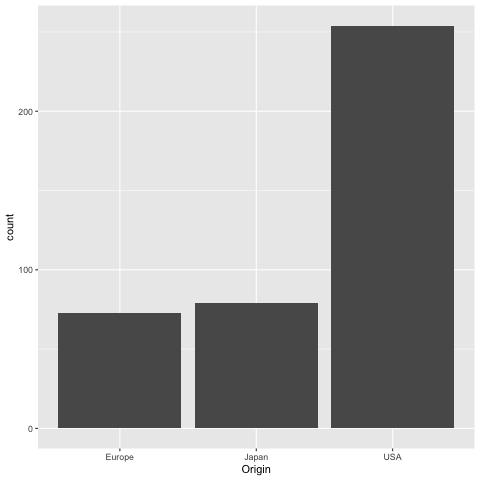

In [ ]:
%%R
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

If we were to present this barplot as a communication firgure,
the bars should not be that wide.
It is more visually appealing with narrower bars.

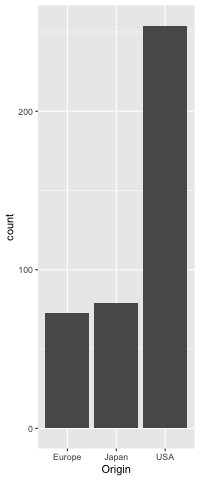

In [ ]:
%%R -w 200
ggplot(cars) +
    aes(x = Origin) +
    geom_bar()

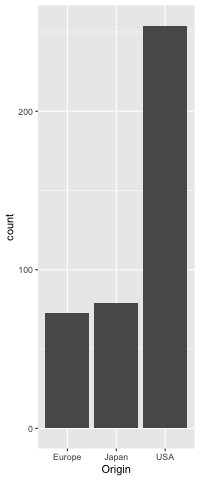

In [ ]:
%%R -w 200
origin_count <- ggplot(cars) +
    aes(x = Origin) +
    geom_bar()
origin_count

To set the widths of figures in the composition plot,
we can use `rel_widths`.

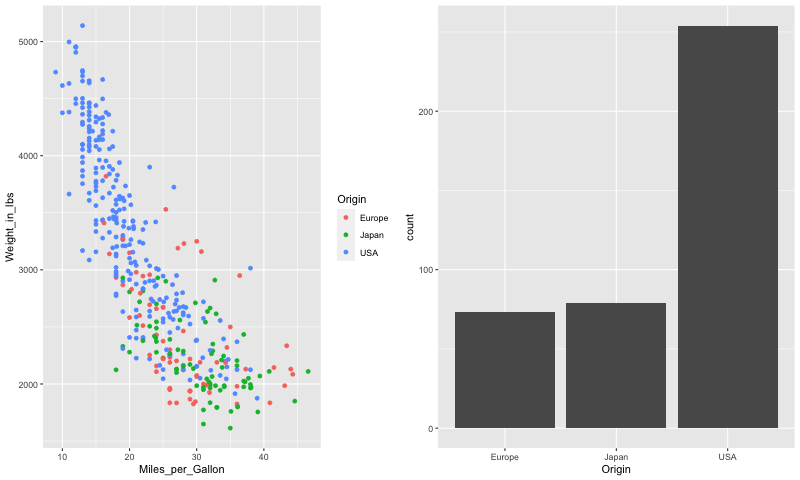

In [ ]:
%%R -w 800
plot_grid(mpg_weight, origin_count)

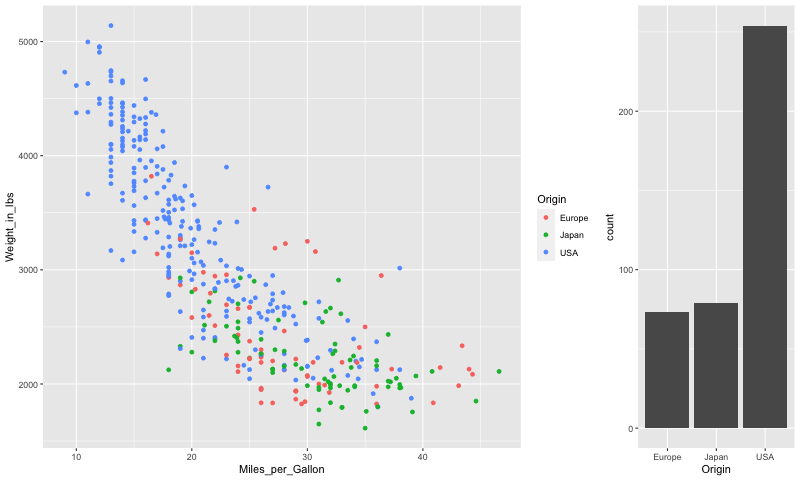

In [ ]:
%%R -w 800
plot_grid(mpg_weight, origin_count, rel_widths=c(3, 1))

It is not that nice to see the legend between the plots,
so lets reorder them.

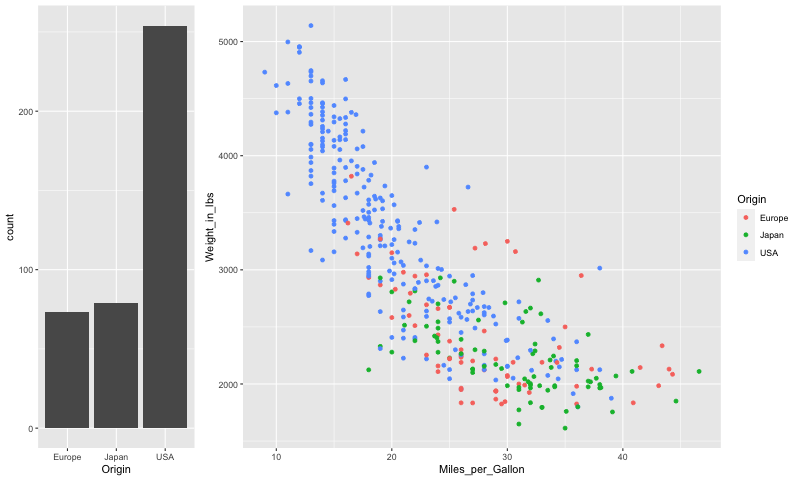

In [ ]:
%%R -w 800
plot_grid(origin_count, mpg_weight, rel_widths=c(1, 3))

To concatenate vertically, 
we set the number of columns to 1.

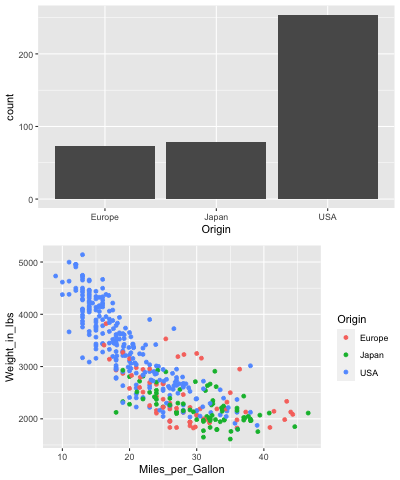

In [ ]:
%%R -w 400
plot_grid(origin_count, mpg_weight, ncol=1)

Finally,
we can nest plot grids within each other.

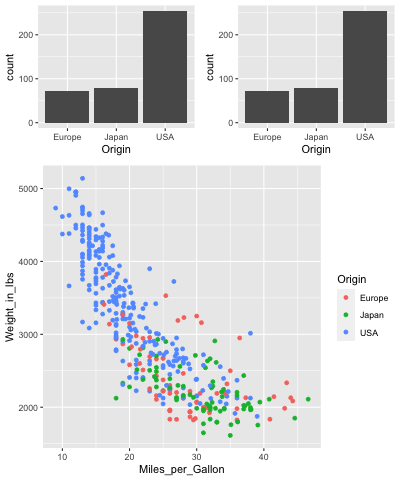

In [ ]:
%%R -w 400
top_row <- plot_grid(origin_count, origin_count)
plot_grid(top_row, mpg_weight, ncol=1, rel_heights=c(1,2))

There are [some more tricks in the readme]( https://wilkelab.org/cowplot/articles/plot_grid.html),
including how to add a common title for the figures
via `ggdraw`.

# Saving figures in ggplot

The `ggsave` functions saves the _most recent_ plot to a file, so you usually want to run this function directly after creating your plot.

In [ ]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid.png')

R[write to console]: Saving 6.67 x 6.67 in image



You can also specify which figure to save.

In [ ]:
%%R
ggsave('grid.png', grid)

R[write to console]: Saving 6.67 x 6.67 in image



Setting the dpi controls the resolution of the saved figure (the default dpi is 300)

In [ ]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid2.png', dpi=96)

R[write to console]: Saving 6.67 x 6.67 in image



You can save to PDF and SVG as well.

In [ ]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid2.pdf')

R[write to console]: Saving 6.67 x 6.67 in image



In [ ]:
%%R
grid <- plot_grid(top_row, mpg_weight, ncol=1)
ggsave('grid2.svg')

R[write to console]: Saving 6.67 x 6.67 in image

